# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [34]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [35]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [36]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [37]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [38]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [39]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [40]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [41]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [42]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [43]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [44]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [45]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [46]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [47]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [48]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [49]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████| 109248/109248 [05:16<00:00, 345.69it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [50]:
# similarly you can preprocess the titles also
#before preprocessing
pd.Series(project_data['project_title']).head(10)
#after preprocessing
from tqdm import tqdm
processed_title= []
pd.Series(project_data['project_title']).head(10)
for sentance in (project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace("-","_")
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    processed_title.append(sent.lower().strip())

<h2><font color='red'> 1.4 Preprocessing of `teacher_prefix`</font></h2>

In [51]:
#Teacher_prefix 

preprocessed_prefix = []
for i in (project_data['teacher_prefix'].values):
    preprocessed_prefix.append(re.sub("[ ,.]", "", str(i)))
project_data['clean_prefix']=preprocessed_prefix
    
from collections import Counter
my_counter = Counter()
for word in project_data['clean_prefix'].values:
    my_counter.update(word.split())
pd.Series(my_counter)
teach_prefix=dict(my_counter)
vectorizer = CountVectorizer(vocabulary=list(teach_prefix.keys()), lowercase=False, binary=False)
vectorizer.fit(project_data['clean_prefix'].values)
print(vectorizer.get_feature_names())


['Mrs', 'Mr', 'Ms', 'Teacher', 'nan', 'Dr']


<h2><font color='red'> 1.4 Preprocessing of `project_grade_category`</font></h2>

In [52]:
#################
# project_grade_category
preprocessed_grade=[]
for i in (project_data['project_grade_category'].values):
    grade1=re.sub(" ", "_", str(i))
    preprocessed_grade.append(re.sub("-", "_", grade1))
project_data['clean_grade']= preprocessed_grade
project_data['clean_grade'].value_counts()

Grades_PreK_2    44225
Grades_3_5       37137
Grades_6_8       16923
Grades_9_12      10963
Name: clean_grade, dtype: int64

## 1.5 Preparing data for models

In [53]:
project_data.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'clean_prefix', 'clean_grade'], dtype=object)

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [171]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [37]:
project_data.columns


Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'clean_prefix', 'clean_grade', 'price',
       'quantity', 'processed_titles', 'processed_essays'],
      dtype='object')

### 1.5.3 Vectorizing Numerical features

In [54]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [55]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [56]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [58]:
project_data['processed_titles']=processed_title
project_data.columns
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head()
project_data['processed_essays']=preprocessed_essays
project_data.drop(['essay','project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)
project_data.head()
project_data.drop(['project_grade_category','teacher_prefix'], axis=1, inplace=True)

In [195]:
#set1
X1=project_data
y = X1['project_is_approved'].values


In [196]:
set1=X1.drop(['Unnamed: 0','id','teacher_id','project_resource_summary','project_submitted_datetime','project_is_approved'], axis=1)
set1.count()

school_state                                    109248
teacher_number_of_previously_posted_projects    109248
clean_categories                                109248
clean_subcategories                             109248
clean_prefix                                    109248
clean_grade                                     109248
price                                           109248
quantity                                        109248
processed_titles                                109248
processed_essays                                109248
dtype: int64

In [197]:
set1.shape

(109248, 10)

__ Computing Sentiment Scores__

In [86]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thribhuvan\AppData\Roaming\nltk_data...
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [62]:
#split the data
from sklearn.model_selection import train_test_split
set1_train, set1_test, y_train, y_test = train_test_split(set1, y, test_size=0.33, stratify=y)
set1_train, set1_cv, y_train, y_cv = train_test_split(set1_train, y_train, test_size=0.33, stratify=y_train)
print(set1_train.shape,y_train.shape)
print(set1_test.shape,y_test.shape)
print(set1_cv.shape,y_cv.shape)


(49041, 10) (49041,)
(36052, 10) (36052,)
(24155, 10) (24155,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [63]:
#encoding categorical and numerical feautres
#school state
vectorizer1 = CountVectorizer()
vectorizer1.fit(set1_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_state_ohe = vectorizer1.transform(set1_train['school_state'].values)
set1_cv_state_ohe = vectorizer1.transform(set1_cv['school_state'].values)
set1_test_state_ohe = vectorizer1.transform(set1_test['school_state'].values)

print("After one hot encoding of categorical data of school_state")
print(set1_train_state_ohe.shape, y_train.shape)
print(set1_cv_state_ohe.shape, y_cv.shape)
print(set1_test_state_ohe.shape, y_test.shape)
print(vectorizer1.get_feature_names())
print("="*100)
#################################################################################################################################
#clean categories
vectorizer2= CountVectorizer()
vectorizer2.fit(set1_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_categories_ohe = vectorizer2.transform(set1_train['clean_categories'].values)
set1_cv_categories_ohe = vectorizer2.transform(set1_cv['clean_categories'].values)
set1_test_categories_ohe = vectorizer2.transform(set1_test['clean_categories'].values)

print("After one hot encoding of categories")
print(set1_train_categories_ohe.shape, y_train.shape)
print(set1_cv_categories_ohe.shape, y_cv.shape)
print(set1_test_categories_ohe.shape, y_test.shape)
print(vectorizer2.get_feature_names())
print("="*100)
#################################################################################################################################
#clean sub-categories
vectorizer3 = CountVectorizer()
vectorizer3.fit(set1_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_subcategories_ohe = vectorizer3.transform(set1_train['clean_subcategories'].values)
set1_cv_subcategories_ohe = vectorizer3.transform(set1_cv['clean_subcategories'].values)
set1_test_subcategories_ohe = vectorizer3.transform(set1_test['clean_subcategories'].values)

print("After one hot encoding of subcategories")
print(set1_train_subcategories_ohe.shape, y_train.shape)
print(set1_cv_subcategories_ohe.shape, y_cv.shape)
print(set1_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)
#################################################################################################################################
#project_grade_category
vectorizer4 = CountVectorizer()
vectorizer4.fit(set1_train['clean_grade'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_grade_ohe = vectorizer4.transform(set1_train['clean_grade'].values)
set1_cv_grade_ohe = vectorizer4.transform(set1_cv['clean_grade'].values)
set1_test_grade_ohe = vectorizer4.transform(set1_test['clean_grade'].values)

print("After one hot encoding of grade")
print(set1_train_grade_ohe.shape, y_train.shape)
print(set1_cv_grade_ohe.shape, y_cv.shape)
print(set1_test_grade_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)
#################################################################################################################################
#teacher_prefix
vectorizer5 = CountVectorizer()
vectorizer5.fit(set1_train['clean_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_prefix_ohe = vectorizer5.transform(set1_train['clean_prefix'].values)
set1_cv_prefix_ohe = vectorizer5.transform(set1_cv['clean_prefix'].values)
set1_test_prefix_ohe = vectorizer5.transform(set1_test['clean_prefix'].values)

print("After  one hot encoding of teacher prefix")
print(set1_train_prefix_ohe.shape, y_train.shape)
print(set1_cv_prefix_ohe.shape, y_cv.shape)
print(set1_test_prefix_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#numerical feautres
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(set1_train['price'].values.reshape(-1,1))

set1_train_price_norm = normalizer.transform(set1_train['price'].values.reshape(-1,1))
set1_cv_price_norm = normalizer.transform(set1_cv['price'].values.reshape(-1,1))
set1_test_price_norm = normalizer.transform(set1_test['price'].values.reshape(-1,1))

print("After normaliztion of numerical feautre price")
print(set1_train_price_norm.shape, y_train.shape)
print(set1_cv_price_norm.shape, y_cv.shape)
print(set1_test_price_norm.shape, y_test.shape)
print("="*100)

###############################################################################################################################
normalizer1 = Normalizer()
normalizer1.fit(set1_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

set1_train_previously_posted_norm = normalizer1.transform(set1_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
set1_cv_previously_posted_norm = normalizer.transform(set1_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
set1_test_previously_posted_norm = normalizer1.transform(set1_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After normaliztion of numerical feautre teacher_number_of_previously_posted_projects ")
print(set1_train_previously_posted_norm.shape, y_train.shape)
print(set1_cv_previously_posted_norm.shape, y_cv.shape)
print(set1_test_previously_posted_norm.shape, y_test.shape)
print("="*100)
###############################################################******************************************************************          
normalizer1 = Normalizer()
normalizer1.fit(set1_train['quantity'].values.reshape(-1,1))

set1_train_quantity_norm = normalizer1.transform(set1_train['quantity'].values.reshape(-1,1))
set1_cv_quantity_norm = normalizer.transform(set1_cv['quantity'].values.reshape(-1,1))
set1_test_quantity_norm = normalizer1.transform(set1_test['quantity'].values.reshape(-1,1))

print("After normaliztion of numerical feautre quantity ")
print(set1_train_quantity_norm.shape, y_train.shape)
print(set1_cv_quantity_norm.shape, y_cv.shape)
print(set1_test_quantity_norm.shape, y_test.shape)
print("="*100)

After one hot encoding of categorical data of school_state
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
After one hot encoding of categories
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
After one hot encoding of subcategories
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [57]:
#vectorzig essays
from sklearn.feature_extraction.text import CountVectorizer
vectorizer6 = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer6.fit(set1_train['processed_essays'].values) # fit has to happen only on train data

set1_train_essay_bow = vectorizer6.transform(set1_train['processed_essays'].values)
set1_cv_essay_bow = vectorizer6.transform(set1_cv['processed_essays'].values)
set1_test_essay_bow = vectorizer6.transform(set1_test['processed_essays'].values)

print("After vectorizations of essays with bag of words range 1,2,3")
print(set1_train_essay_bow.shape, y_train.shape)  
print(set1_cv_essay_bow.shape, y_cv.shape)
print(set1_test_essay_bow.shape, y_test.shape)
print("="*100)

#vectorize title
vectorizer7 = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer7.fit(set1_train['processed_titles'].values) 
set1_train_title_bow = vectorizer7.transform(set1_train['processed_titles'].values)
set1_cv_title_bow = vectorizer7.transform(set1_cv['processed_titles'].values)
set1_test_title_bow = vectorizer7.transform(set1_test['processed_titles'].values)

print("After vectorizations of title with bag of words range 1,2,3")
print(set1_train_title_bow.shape, y_train.shape)#vectrozing the test train cv seperately
print(set1_cv_title_bow.shape, y_cv.shape)
print(set1_test_title_bow.shape, y_test.shape)
print("="*100)

from scipy.sparse import hstack
set1_tr = hstack((set1_train_essay_bow,set1_train_title_bow,set1_train_state_ohe,set1_train_categories_ohe,set1_train_subcategories_ohe,set1_train_grade_ohe,set1_train_prefix_ohe,set1_train_price_norm,set1_train_previously_posted_norm)).tocsr()
set1_cr = hstack((set1_cv_essay_bow,set1_cv_title_bow, set1_cv_state_ohe,set1_cv_categories_ohe,set1_cv_subcategories_ohe,set1_cv_grade_ohe,set1_cv_prefix_ohe,set1_cv_price_norm,set1_cv_previously_posted_norm)).tocsr()
set1_te = hstack((set1_test_essay_bow,set1_test_title_bow,set1_test_state_ohe,set1_test_categories_ohe,set1_test_subcategories_ohe,set1_test_grade_ohe,set1_test_prefix_ohe,set1_test_price_norm,set1_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(set1_tr.shape, y_train.shape)
print(set1_cr.shape, y_cv.shape)
print(set1_te.shape, y_test.shape)
print("="*100)

After vectorizations of essays with bag of words range 1,2,3
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)
After vectorizations of title with bag of words range 1,2,3
(49041, 4166) (49041,)
(24155, 4166) (24155,)
(36052, 4166) (36052,)
Final Data matrix
(49041, 9268) (49041,)
(24155, 9268) (24155,)
(36052, 9268) (36052,)


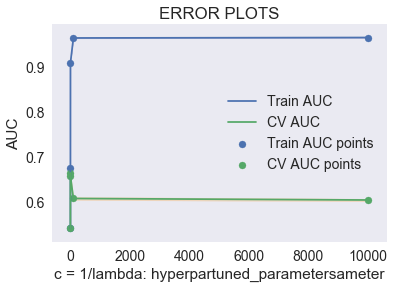

In [58]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
cls=LogisticRegression()
tuned_parameters = {'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}

clf = GridSearchCV(LogisticRegression(penalty='l1'), param_grid=tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(set1_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("c = 1/lambda: hyperpartuned_parametersameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [206]:
tuned_parameters = [{'C': [10**-4, 10**-2,10**-1, 10**0]}]


model = GridSearchCV(LogisticRegression(),tuned_parameters , scoring = 'f1', cv=5)
model.fit(set1_tr, y_train)

print(model.best_estimator_)
print(model.score(set1_cr, y_cv))

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.9180977255414082


In [209]:
tuned_parameters = [{'C': [10**-3, 10**-2,10**-1 ,10**4,10**-4]}]


model = GridSearchCV(LogisticRegression(),tuned_parameters , scoring = 'f1', cv=5)
model.fit(set1_tr, y_train)

print(model.best_estimator_)
print(model.score(set1_cr, y_cv))

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.9180977255414082


In [59]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

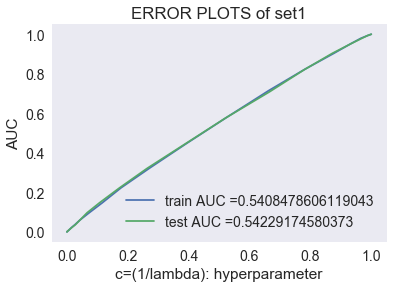

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc

best_lambda=0.0001
clf = LogisticRegression(C=best_lambda, penalty='l1')
clf.fit(set1_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, set1_tr)    
y_test_pred = batch_predict(clf, set1_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("c=(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set1")
plt.grid()
plt.show()

In [61]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
Train_confusion_matrix=(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
Test_confusion_matrix=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))

the maximum value of tpr*(1-fpr) 0.24926006622918623 for threshold 0.798
the maximum value of tpr*(1-fpr) 0.24954456577686931 for threshold 0.798


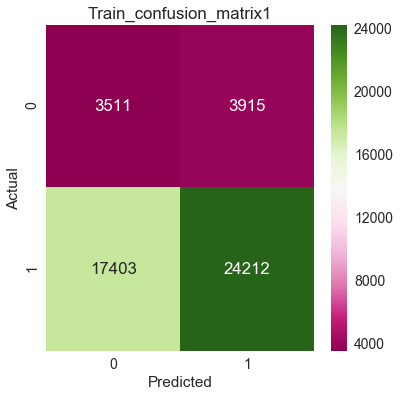

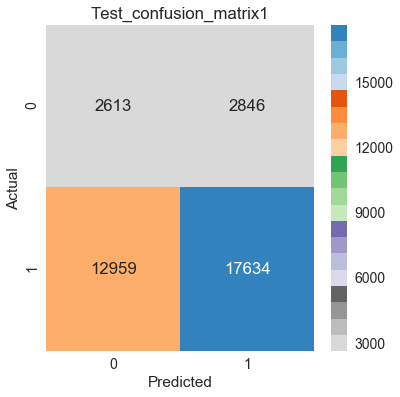

In [62]:
#https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_cm = pd.DataFrame(Train_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Train_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="PiYG", annot=True,fmt="d")# font size

#Test_confusion_matrix
df_cm = pd.DataFrame(Test_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Test_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="tab20c_r",annot=True,fmt="d")# font si

## SET:2


In [37]:
from sklearn.model_selection import train_test_split
set2_train, set2_test, y_train, y_test = train_test_split(set1, y, test_size=0.33, stratify=y)
set2_train, set2_cv, y_train, y_cv = train_test_split(set2_train, y_train, test_size=0.33, stratify=y_train)
print(set2_train.shape,y_train.shape)
print(set2_test.shape,y_test.shape)
print(set2_cv.shape,y_cv.shape)

(49041, 10) (49041,)
(36052, 10) (36052,)
(24155, 10) (24155,)


## TFIDF vectoriser for both essay and tittle

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer10 = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer10.fit(set2_train['processed_essays'].values) # fit has to happen only on train data

set2_train_essay_tfidf = vectorizer10.transform(set2_train['processed_essays'].values)
set2_cv_essay_tfidf = vectorizer10.transform(set2_cv['processed_essays'].values)
set2_test_essay_tfidf = vectorizer10.transform(set2_test['processed_essays'].values)

print("After vectorizations of essays with tfidf range 1,2")
print(set2_train_essay_tfidf.shape, y_train.shape)
print(set2_cv_essay_tfidf.shape, y_cv.shape)
print(set2_test_essay_tfidf.shape, y_test.shape)
print("="*100)

#vectorize title
vectorizer11 = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer11.fit(set2_train['processed_titles'].values) # fit has to happen only on train data

set2_train_title_tfidf = vectorizer11.transform(set2_train['processed_titles'].values)
set2_cv_title_tfidf = vectorizer11.transform(set2_cv['processed_titles'].values)
set2_test_title_tfidf = vectorizer11.transform(set2_test['processed_titles'].values)

print("After vectorizations of title with TFIDF range 1,2")
print(set2_train_title_tfidf.shape, y_train.shape)
print(set2_cv_title_tfidf.shape, y_cv.shape)
print(set2_test_title_tfidf.shape, y_test.shape)
print("="*100)


After vectorizations of essays with tfidf range 1,2
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)
After vectorizations of title with TFIDF range 1,2
(49041, 3749) (49041,)
(24155, 3749) (24155,)
(36052, 3749) (36052,)


In [41]:
from scipy.sparse import hstack
set2_tr = hstack((set2_train_essay_tfidf,set2_train_title_tfidf,set1_train_state_ohe,set1_train_categories_ohe,set1_train_subcategories_ohe,set1_train_grade_ohe,set1_train_prefix_ohe,set1_train_price_norm,set1_train_previously_posted_norm)).tocsr()
set2_cr = hstack((set2_cv_essay_tfidf,set2_cv_title_tfidf, set1_cv_state_ohe,set1_cv_categories_ohe,set1_cv_subcategories_ohe,set1_cv_grade_ohe,set1_cv_prefix_ohe,set1_cv_price_norm,set1_cv_previously_posted_norm)).tocsr()
set2_te = hstack((set2_test_essay_tfidf,set2_test_title_tfidf,set1_test_state_ohe,set1_test_categories_ohe,set1_test_subcategories_ohe,set1_test_grade_ohe,set1_test_prefix_ohe,set1_test_price_norm,set1_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(set2_tr.shape, y_train.shape)
print(set2_cr.shape, y_cv.shape)
print(set2_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 8851) (49041,)
(24155, 8851) (24155,)
(36052, 8851) (36052,)


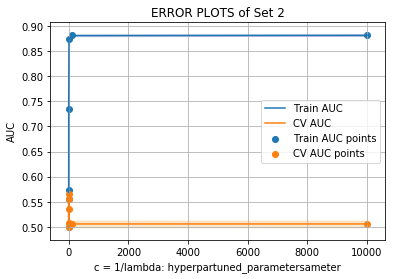

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
tuned_parameters = {'C': [10**-4, 10**-2, 10**-1,10**0,10**1, 10**2, 10**4]}

clf = GridSearchCV(LogisticRegression(penalty='l1'), param_grid=tuned_parameters, cv=5, scoring='roc_auc')
clf.fit(set2_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("c = 1/lambda: hyperpartuned_parametersameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of Set 2")
plt.grid()
plt.show()

## HyperParameter Tuning

In [44]:
tuned_parameters = [{'C': [10**-3, 10**-2,10**-1 ,10**0,10**1 ,10**-4]}]


model = GridSearchCV(LogisticRegression(),tuned_parameters , scoring = 'f1', cv=5)
model.fit(set2_tr, y_train)

print(model.best_estimator_)
print(model.score(set2_cr, y_cv))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9181018072693884


In [47]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

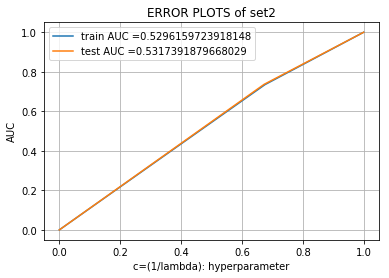

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc

best_lambda=0.001
clf = LogisticRegression(C=best_lambda, penalty='l2')
clf.fit(set2_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, set2_tr)    
y_test_pred = batch_predict(clf, set2_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("c=(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set2")
plt.grid()
plt.show()

In [55]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
Train_confusion_matrix=(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
Test_confusion_matrix=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))

the maximum value of tpr*(1-fpr) 0.21916490484187678 for threshold 0.831
the maximum value of tpr*(1-fpr) 0.2201284594805065 for threshold 0.831


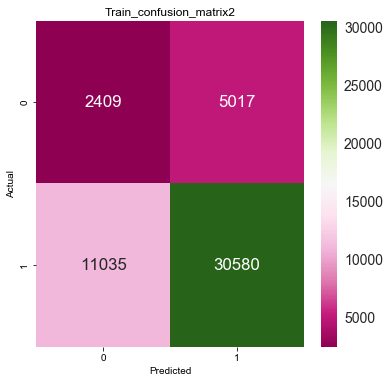

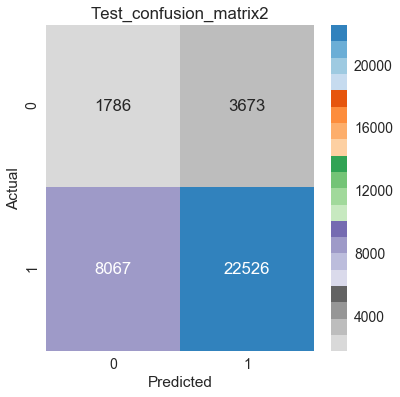

In [56]:
#https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_cm = pd.DataFrame(Train_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Train_confusion_matrix2")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="PiYG", annot=True,fmt="d")# font size

#Test_confusion_matrix
df_cm = pd.DataFrame(Test_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Test_confusion_matrix2")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="tab20c_r",annot=True,fmt="d")# font si

## SET : 3

In [63]:
from sklearn.model_selection import train_test_split
set3_train, set3_test, y_train, y_test = train_test_split(set1, y, test_size=0.33, stratify=y)
set3_train, set3_cv, y_train, y_cv = train_test_split(set3_train, y_train, test_size=0.33, stratify=y_train)
print(set3_train.shape,y_train.shape)
print(set3_test.shape,y_test.shape)
print(set3_cv.shape,y_cv.shape)

(49041, 10) (49041,)
(36052, 10) (36052,)
(24155, 10) (24155,)


In [66]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [65]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essays_train = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_train['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_train.append(vector)

print(len(avg_w2v_essays_train))
print(len(avg_w2v_essays_train[0]))
print("*"*100)

avg_w2v_essays_test= [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_test['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_test.append(vector)


print(len(avg_w2v_essays_test))
print(len(avg_w2v_essays_test[0]))

print("*"*100)
avg_w2v_essays_cv= [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_cv['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_cv.append(vector)

print(len(avg_w2v_essays_cv))
print(len(avg_w2v_essays_cv[0]))

print("*"*100)
print("Tittle")

#title
avg_w2v_titles_train = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_train['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_train.append(vector)

print(len(avg_w2v_titles_train))
print(len(avg_w2v_titles_train[0]))
print("*"*100)

avg_w2v_titles_test= [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_test['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_test.append(vector)


print(len(avg_w2v_titles_test))
print(len(avg_w2v_titles_test[0]))

print("*"*100)
avg_w2v_titles_cv= [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_cv['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_cv.append(vector)

print(len(avg_w2v_titles_cv))
print(len(avg_w2v_titles_cv[0]))


49041
300
****************************************************************************************************
36052
300
****************************************************************************************************
24155
300
****************************************************************************************************
Tittle
49041
300
****************************************************************************************************
36052
300
****************************************************************************************************
24155
300


In [66]:
#concatinating all the feautres of given in set1
from scipy.sparse import hstack
set3_tr = hstack((avg_w2v_essays_train,avg_w2v_titles_train,set1_train_state_ohe,set1_train_categories_ohe,set1_train_subcategories_ohe,set1_train_grade_ohe,set1_train_prefix_ohe,set1_train_price_norm,set1_train_previously_posted_norm)).tocsr()
set3_cr = hstack((avg_w2v_essays_cv,avg_w2v_titles_cv, set1_cv_state_ohe,set1_cv_categories_ohe,set1_cv_subcategories_ohe,set1_cv_grade_ohe,set1_cv_prefix_ohe,set1_cv_price_norm,set1_cv_previously_posted_norm)).tocsr()
set3_te = hstack((avg_w2v_essays_test,avg_w2v_titles_test,set1_test_state_ohe,set1_test_categories_ohe,set1_test_subcategories_ohe,set1_test_grade_ohe,set1_test_prefix_ohe,set1_test_price_norm,set1_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(set3_tr.shape, y_train.shape)
print(set3_cr.shape, y_cv.shape)
print(set3_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 702) (49041,)
(24155, 702) (24155,)
(36052, 702) (36052,)


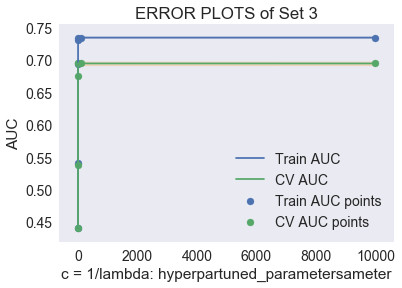

In [68]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
tuned_parameters = {'C': [10**-4, 10**-2, 10**-1,10**0,10**1, 10**2, 10**4]}

clf = GridSearchCV(LogisticRegression(penalty='l1'), param_grid=tuned_parameters, cv=5, scoring='roc_auc')
clf.fit(set3_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("c = 1/lambda: hyperpartuned_parametersameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of Set 3")
plt.grid()
plt.show()

In [69]:
tuned_parameters = [{'C': [10**-3, 10**-2,10**-1 ,10**0,10**1 ,10**-4]}]


model = GridSearchCV(LogisticRegression(),tuned_parameters , scoring = 'f1', cv=5)
model.fit(set3_tr, y_train)

print(model.best_estimator_)
print(model.score(set3_cr, y_cv))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9183847257081392


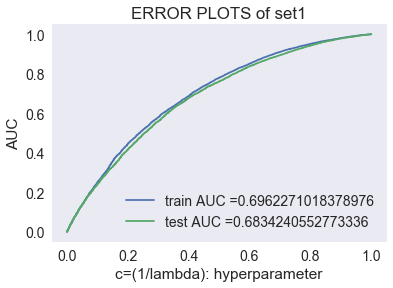

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc

best_lambda=0.1
clf = LogisticRegression(C=best_lambda, penalty='l1')
clf.fit(set3_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, set3_tr)    
y_test_pred = batch_predict(clf, set3_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("c=(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set3")
plt.grid()
plt.show()

In [72]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
Train_confusion_matrix=(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
Test_confusion_matrix=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))

the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.811
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.815


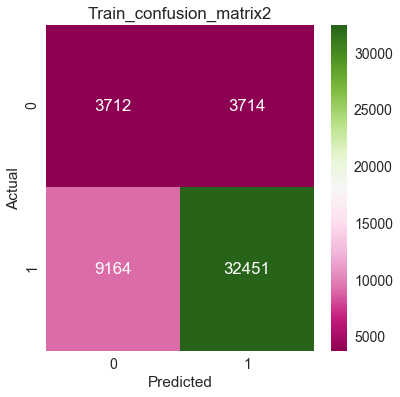

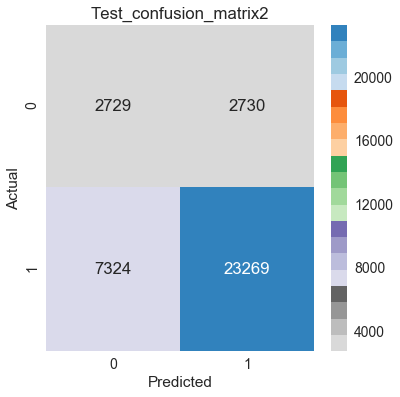

In [73]:
#https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_cm = pd.DataFrame(Train_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Train_confusion_matrix2")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="PiYG", annot=True,fmt="d")# font size

#Test_confusion_matrix
df_cm = pd.DataFrame(Test_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Test_confusion_matrix2")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="tab20c_r",annot=True,fmt="d")# font si

## set : 4 

In [64]:
# Please write all the code with proper documentationfrom sklearn.model_selection import train_test_split
set4_train, set4_test, y_train, y_test = train_test_split(set1, y, test_size=0.33, stratify=y)
set4_train, set4_cv, y_train, y_cv = train_test_split(set4_train, y_train, test_size=0.33, stratify=y_train)
print(set4_train.shape,y_train.shape)
print(set4_test.shape,y_test.shape)
print(set4_cv.shape,y_cv.shape)

(49041, 10) (49041,)
(36052, 10) (36052,)
(24155, 10) (24155,)


In [65]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(set4_train['processed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [67]:
#tfidf w2vec on train model
tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(set4_train['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays.append(vector)

print(len(tfidf_w2v_essays))
print(len(tfidf_w2v_essays[0]))# average Word2Vec
# compute average word2vec for each review.



100%|███████████████████████████████████| 49041/49041 [02:32<00:00, 321.28it/s]


49041
300


In [68]:
#tfidf W2vec of test model
tfidf_w2v_essays_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(set4_test['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays_test.append(vector)

print(len(tfidf_w2v_essays_test))
print(len(tfidf_w2v_essays_test[0]))# average W

100%|███████████████████████████████████| 36052/36052 [02:07<00:00, 283.35it/s]


36052
300


In [69]:
#tfidf W2vec of CV model
tfidf_w2v_essays_cv= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(set4_cv['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays_cv.append(vector)

print(len(tfidf_w2v_essays_cv))
print(len(tfidf_w2v_essays_cv[0]))# average W


100%|███████████████████████████████████| 24155/24155 [01:21<00:00, 296.74it/s]


24155
300


In [70]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(set4_train['processed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [71]:
tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (set4_train['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))# average Word2Vec
# compute average word2vec for each review.



49041
300


In [72]:
tfidf_w2v_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (set4_test['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles_test.append(vector)

print(len(tfidf_w2v_titles_test))
print(len(tfidf_w2v_titles_test[1]))# average Word2Vec
# compute average word2vec for each review.


36052
300


In [73]:
tfidf_w2v_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (set4_cv['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles_cv.append(vector)

print(len(tfidf_w2v_titles_cv))
print(len(tfidf_w2v_titles_cv[0]))# average Word2Vec
# compute average word2vec for each review.


24155
300


In [74]:
#concatinating all the feautres of given in set1
from scipy.sparse import hstack
set4_tr = hstack((tfidf_w2v_essays,tfidf_w2v_titles,set1_train_state_ohe,set1_train_categories_ohe,set1_train_subcategories_ohe,set1_train_grade_ohe,set1_train_prefix_ohe,set1_train_price_norm,set1_train_previously_posted_norm)).tocsr()
set4_cr = hstack((tfidf_w2v_essays_cv,tfidf_w2v_titles_cv, set1_cv_state_ohe,set1_cv_categories_ohe,set1_cv_subcategories_ohe,set1_cv_grade_ohe,set1_cv_prefix_ohe,set1_cv_price_norm,set1_cv_previously_posted_norm)).tocsr()
set4_te = hstack((tfidf_w2v_titles_test,tfidf_w2v_titles_test,set1_test_state_ohe,set1_test_categories_ohe,set1_test_subcategories_ohe,set1_test_grade_ohe,set1_test_prefix_ohe,set1_test_price_norm,set1_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(set4_tr.shape, y_train.shape)
print(set4_cr.shape, y_cv.shape)
print(set4_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 702) (49041,)
(24155, 702) (24155,)
(36052, 702) (36052,)


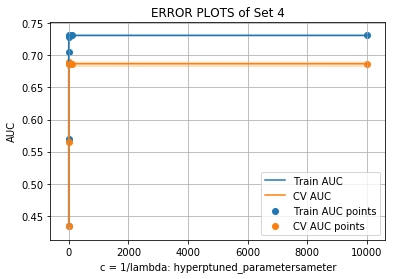

In [76]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
tuned_parameters = {'C': [10**-4, 10**-2, 10**-1,10**0,10**1, 10**2, 10**4]}

clf = GridSearchCV(LogisticRegression(penalty='l1'), param_grid=tuned_parameters, cv=5, scoring='roc_auc')
clf.fit(set4_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("c = 1/lambda: hyperptuned_parametersameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of Set 4")
plt.grid()
plt.show()

In [77]:
tuned_parameters = [{'C': [10**-3, 10**-2,10**-1 ,10**0,10**1 ,10**-4]}]


model = GridSearchCV(LogisticRegression(),tuned_parameters , scoring = 'f1', cv=5)
model.fit(set4_tr, y_train)

print(model.best_estimator_)
print(model.score(set4_cr, y_cv))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9181018072693884


In [79]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

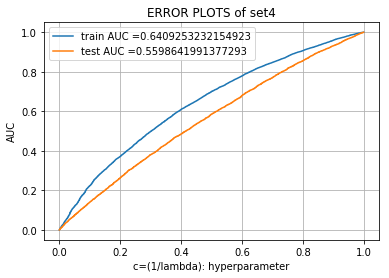

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc

best_lambda=0.001
clf = LogisticRegression(C=best_lambda, penalty='l2')
clf.fit(set4_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, set4_tr)    
y_test_pred = batch_predict(clf, set4_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("c=(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set4")
plt.grid()
plt.show()

In [83]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
Train_confusion_matrix=(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
Test_confusion_matrix=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))

the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.833
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.843


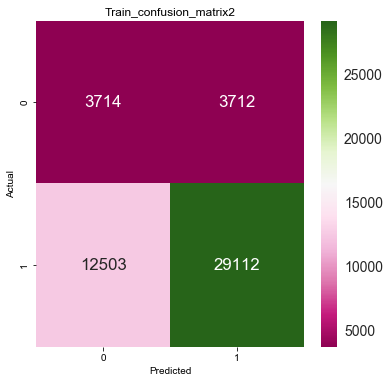

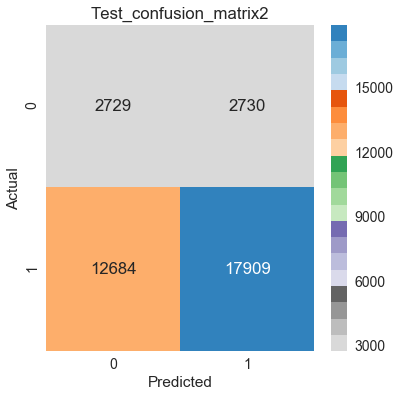

In [84]:
#https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_cm = pd.DataFrame(Train_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Train_confusion_matrix2")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="PiYG", annot=True,fmt="d")# font size

#Test_confusion_matrix
df_cm = pd.DataFrame(Test_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Test_confusion_matrix2")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="tab20c_r",annot=True,fmt="d")# font si

<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [198]:
set1.columns
#set1['processed_essays'][4]

Index(['school_state', 'teacher_number_of_previously_posted_projects',
       'clean_categories', 'clean_subcategories', 'clean_prefix',
       'clean_grade', 'price', 'quantity', 'processed_titles',
       'processed_essays'],
      dtype='object')

## SENTIMENT ANALYSER

In [199]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import nltk
#nltk.download('vader_lexicon')
sentiment_score_essays=[]
sid = SentimentIntensityAnalyzer()
for i in set1['processed_essays'].values:
    ss = sid.polarity_scores(i)
    sentiment_score_essays.append(ss)
# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

In [250]:
pos_score=[]
neg_score=[]
neu_score=[]
comp_score=[]
for i in  range(len(sentiment_score_essays)):
    pos_score.append(sentiment_score_essays[i]['pos'])
    neg_score.append(sentiment_score_essays[i]['neg'])
    neu_score.append(sentiment_score_essays[i]['neu'])
    comp_score.append(sentiment_score_essays[i]['compound'])

In [253]:
print(sentiment_score_essays[len(sentiment_score_essays)-1])
print(neg_score[len(sentiment_score_essays)-1])
print(neu_score[len(sentiment_score_essays)-1])
print(pos_score[len(sentiment_score_essays)-1])
print(comp_score[len(sentiment_score_essays)-1])

{'neg': 0.059, 'neu': 0.693, 'pos': 0.248, 'compound': 0.9868}
0.059
0.693
0.248
0.9868


In [201]:
#length of each essay
len_essays=[]
for i in set1['processed_essays'].values:
    aa=len(i.split())
    len_essays.append(aa)

In [254]:
set5['neg_score']=neg_score
set5['neu_score']=neu_score
set5['pos_score']=pos_score
set5['comp_score']=comp_score

In [158]:
#length of each title
len_titles=[]
for i in set1['processed_titles'].values:
    aa=len(i.split())
    len_titles.append(aa)

In [203]:
set5=set1
set5['len_titles']=len_titles
set5['len_essays']=len_essays
set5['sentiment_score_essays1']=sentiment_score_essays1


In [259]:
#set5.drop(['sentiment_score_essays1'], axis=1, inplace=True)
set5.head()
#print(set5.shape)
#y.shape

,school_state,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,clean_prefix,clean_grade,price,quantity,len_titles,len_essays,neg_score,neu_score,pos_score,comp_score
0,IN,0,Literacy_Language,ESL Literacy,Mrs,Grades_PreK_2,154.60,23,5,161,0.012,0.844,0.144,0.9694
1,FL,7,History_Civics Health_Sports,Civics_Government TeamSports,Mr,Grades_6_8,299.00,1,4,109,0.048,0.669,0.283,0.9856
2,AZ,1,Health_Sports,Health_Wellness TeamSports,Ms,Grades_6_8,516.85,22,6,202,0.122,0.659,0.219,0.9816
3,KY,4,Literacy_Language Math_Science,Literacy Mathematics,Mrs,Grades_PreK_2,232.90,4,2,121,0.106,0.649,0.246,0.9656
4,TX,1,Math_Science,Mathematics,Mrs,Grades_PreK_2,67.98,4,3,122,0.066,0.791,0.143,0.8524


<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

## Categorization of feautres

In [265]:
#encoding categorical and numerical feautres
#school state
vectorizer1 = CountVectorizer()
vectorizer1.fit(set5_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set5_train_state_ohe = vectorizer1.transform(set5_train['school_state'].values)
set5_cv_state_ohe = vectorizer1.transform(set5_cv['school_state'].values)
set5_test_state_ohe = vectorizer1.transform(set5_test['school_state'].values)

print("After one hot encoding of categorical data of school_state")
print(set5_train_state_ohe.shape, y_train.shape)
print(set5_cv_state_ohe.shape, y_cv.shape)
print(set5_test_state_ohe.shape, y_test.shape)
print(vectorizer1.get_feature_names())
print("="*100)
#################################################################################################################################
#clean categories
vectorizer2= CountVectorizer()
vectorizer2.fit(set5_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set5_train_categories_ohe = vectorizer2.transform(set5_train['clean_categories'].values)
set5_cv_categories_ohe = vectorizer2.transform(set5_cv['clean_categories'].values)
set5_test_categories_ohe = vectorizer2.transform(set5_test['clean_categories'].values)

print("After one hot encoding of categories")
print(set5_train_categories_ohe.shape, y_train.shape)
print(set5_cv_categories_ohe.shape, y_cv.shape)
print(set5_test_categories_ohe.shape, y_test.shape)
print(vectorizer2.get_feature_names())
print("="*100)
#################################################################################################################################
#clean sub-categories
vectorizer3 = CountVectorizer()
vectorizer3.fit(set5_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set5_train_subcategories_ohe = vectorizer3.transform(set5_train['clean_subcategories'].values)
set5_cv_subcategories_ohe = vectorizer3.transform(set5_cv['clean_subcategories'].values)
set5_test_subcategories_ohe = vectorizer3.transform(set5_test['clean_subcategories'].values)

print("After one hot encoding of subcategories")
print(set5_train_subcategories_ohe.shape, y_train.shape)
print(set5_cv_subcategories_ohe.shape, y_cv.shape)
print(set5_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)
#################################################################################################################################
#project_grade_category
vectorizer4 = CountVectorizer()
vectorizer4.fit(set5_train['clean_grade'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set5_train_grade_ohe = vectorizer4.transform(set5_train['clean_grade'].values)
set5_cv_grade_ohe = vectorizer4.transform(set5_cv['clean_grade'].values)
set5_test_grade_ohe = vectorizer4.transform(set5_test['clean_grade'].values)

print("After one hot encoding of grade")
print(set5_train_grade_ohe.shape, y_train.shape)
print(set5_cv_grade_ohe.shape, y_cv.shape)
print(set5_test_grade_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)
#################################################################################################################################
#teacher_prefix
vectorizer5 = CountVectorizer()
vectorizer5.fit(set5_train['clean_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set5_train_prefix_ohe = vectorizer5.transform(set5_train['clean_prefix'].values)
set5_cv_prefix_ohe = vectorizer5.transform(set5_cv['clean_prefix'].values)
set5_test_prefix_ohe = vectorizer5.transform(set5_test['clean_prefix'].values)

print("After  one hot encoding of teacher prefix")
print(set5_train_prefix_ohe.shape, y_train.shape)
print(set5_cv_prefix_ohe.shape, y_cv.shape)
print(set5_test_prefix_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#numerical feautres
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(set5_train['price'].values.reshape(-1,1))

set5_train_price_norm = normalizer.transform(set5_train['price'].values.reshape(-1,1))
set5_cv_price_norm = normalizer.transform(set5_cv['price'].values.reshape(-1,1))
set5_test_price_norm = normalizer.transform(set5_test['price'].values.reshape(-1,1))

print("After normaliztion of numerical feautre price")
print(set5_train_price_norm.shape, y_train.shape)
print(set5_cv_price_norm.shape, y_cv.shape)
print(set5_test_price_norm.shape, y_test.shape)
print("="*100)

###############################################################################################################################
normalizer1 = Normalizer()
normalizer1.fit(set5_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

set5_train_previously_posted_norm = normalizer1.transform(set5_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
set5_cv_previously_posted_norm = normalizer.transform(set5_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
set5_test_previously_posted_norm = normalizer1.transform(set5_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After normaliztion of numerical feautre teacher_number_of_previously_posted_projects ")
print(set5_train_previously_posted_norm.shape, y_train.shape)
print(set5_cv_previously_posted_norm.shape, y_cv.shape)
print(set5_test_previously_posted_norm.shape, y_test.shape)
print("="*100)
###############################################################******************************************************************          
normalizer1 = Normalizer()
normalizer1.fit(set5_train['len_titles'].values.reshape(-1,1))

set5_train_len_titles_norm = normalizer1.transform(set5_train['len_titles'].values.reshape(-1,1))
set5_cv_len_titles_norm = normalizer.transform(set5_cv['len_titles'].values.reshape(-1,1))
set5_test_len_titles_norm = normalizer1.transform(set5_test['len_titles'].values.reshape(-1,1))

print("After normaliztion of numerical feautre len(titles) ")
print(set5_train_len_titles_norm.shape, y_train.shape)
print(set5_cv_len_titles_norm.shape, y_cv.shape)
print(set5_test_len_titles_norm.shape, y_test.shape)
print("="*100)
#######################################3##############################################################################
normalizer1 = Normalizer()
normalizer1.fit(set5_train['len_essays'].values.reshape(-1,1))

set5_train_len_essays_norm = normalizer1.transform(set5_train['len_essays'].values.reshape(-1,1))
set5_cv_len_essays_norm = normalizer.transform(set5_cv['len_essays'].values.reshape(-1,1))
set5_test_len_essays_norm = normalizer1.transform(set5_test['len_essays'].values.reshape(-1,1))

print("After normaliztion of numerical feautre len(essays) ")
print(set5_train_len_essays_norm.shape, y_train.shape)
print(set5_cv_len_essays_norm.shape, y_cv.shape)
print(set5_test_len_essays_norm.shape, y_test.shape)
print("="*100)
#############################################################################################################################################
normalizer1 = Normalizer()
normalizer1.fit(set5_train['pos_score'].values.reshape(-1,1))

set5_train_pos_score_norm = normalizer1.transform(set5_train['pos_score'].values.reshape(-1,1))
set5_cv_pos_score_norm = normalizer.transform(set5_cv['pos_score'].values.reshape(-1,1))
set5_test_pos_score_norm = normalizer1.transform(set5_test['pos_score'].values.reshape(-1,1))

print("After normaliztion of numerical feautre pos_score ")
print(set5_train_pos_score_norm.shape, y_train.shape)
print(set5_cv_pos_score_norm.shape, y_cv.shape)
print(set5_test_pos_score_norm.shape, y_test.shape)
print("="*100)
#######################################################################################################
normalizer1 = Normalizer()
normalizer1.fit(set5_train['neg_score'].values.reshape(-1,1))

set5_train_neg_score_norm = normalizer1.transform(set5_train['neg_score'].values.reshape(-1,1))
set5_cv_neg_score_norm = normalizer.transform(set5_cv['neg_score'].values.reshape(-1,1))
set5_test_neg_score_norm = normalizer1.transform(set5_test['neg_score'].values.reshape(-1,1))

print("After normaliztion of numerical feautre neg_score ")
print(set5_train_neg_score_norm.shape, y_train.shape)
print(set5_cv_neg_score_norm.shape, y_cv.shape)
print(set5_test_neg_score_norm.shape, y_test.shape)
print("="*100)
###############################################333333333333333#####################################
normalizer1 = Normalizer()
normalizer1.fit(set5_train['neu_score'].values.reshape(-1,1))

set5_train_neu_score_norm = normalizer1.transform(set5_train['neu_score'].values.reshape(-1,1))
set5_cv_neu_score_norm = normalizer.transform(set5_cv['neu_score'].values.reshape(-1,1))
set5_test_neu_score_norm = normalizer1.transform(set5_test['neu_score'].values.reshape(-1,1))

print("After normaliztion of numerical feautre neu_score ")
print(set5_train_neu_score_norm.shape, y_train.shape)
print(set5_cv_neu_score_norm.shape, y_cv.shape)
print(set5_test_neu_score_norm.shape, y_test.shape)
print("="*100)
##########################################################################################################
normalizer1 = Normalizer()
normalizer1.fit(set5_train['comp_score'].values.reshape(-1,1))

set5_train_comp_score_norm = normalizer1.transform(set5_train['comp_score'].values.reshape(-1,1))
set5_cv_comp_score_norm = normalizer.transform(set5_cv['comp_score'].values.reshape(-1,1))
set5_test_comp_score_norm = normalizer1.transform(set5_test['comp_score'].values.reshape(-1,1))

print("After normaliztion of numerical feautre comp_score ")
print(set5_train_comp_score_norm.shape, y_train.shape)
print(set5_cv_comp_score_norm.shape, y_cv.shape)
print(set5_test_comp_score_norm.shape, y_test.shape)
print("="*100)

After one hot encoding of categorical data of school_state
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
After one hot encoding of categories
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
After one hot encoding of subcategories
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 

In [ ]:
normalizer1 = Normalizer()
normalizer1.fit(set5_train['comp_score'].values.reshape(-1,1))

set5_train_comp_score_norm = normalizer1.transform(set5_train['comp_score'].values.reshape(-1,1))
set5_cv_comp_score_norm = normalizer.transform(set5_cv['comp_score'].values.reshape(-1,1))
set5_test_comp_score_norm = normalizer1.transform(set5_test['comp_score'].values.reshape(-1,1))

print("After normaliztion of numerical feautre len(essays) ")
print(set5_train_comp_score_norm.shape, y_train.shape)
print(set5_cv_comp_score_norm.shape, y_cv.shape)
print(set5_test_comp_score_norm.shape, y_test.shape)
print("="*100)

In [267]:
set5_tr = hstack((set5_train_pos_score_norm,set5_train_neg_score_norm,set5_train_neu_score_norm,set5_train_comp_score_norm,set5_train_len_titles_norm,set5_train_len_essays_norm,set5_train_state_ohe,set5_train_categories_ohe,set5_train_subcategories_ohe,set5_train_grade_ohe,set5_train_prefix_ohe,set5_train_price_norm,set5_train_previously_posted_norm)).tocsr()
set5_cr = hstack((set5_cv_pos_score_norm,set5_cv_neg_score_norm,set5_cv_neu_score_norm,set5_cv_comp_score_norm,set5_cv_len_titles_norm,set5_cv_len_essays_norm,set5_cv_state_ohe,set5_cv_categories_ohe,set5_cv_subcategories_ohe,set5_cv_grade_ohe,set5_cv_prefix_ohe,set5_cv_price_norm,set5_cv_previously_posted_norm)).tocsr()
set5_te = hstack((set5_test_pos_score_norm,set5_test_neg_score_norm,set5_test_neu_score_norm,set5_test_comp_score_norm,set5_test_len_titles_norm,set5_test_len_essays_norm,set5_test_state_ohe,set5_test_categories_ohe,set5_test_subcategories_ohe,set5_test_grade_ohe,set5_test_prefix_ohe,set5_test_price_norm,set5_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(set5_tr.shape, y_train.shape)
print(set5_cr.shape, y_cv.shape)
print(set5_te.shape, y_test.shape)
print("="*100)


Final Data matrix
(49041, 107) (49041,)
(24155, 107) (24155,)
(36052, 107) (36052,)


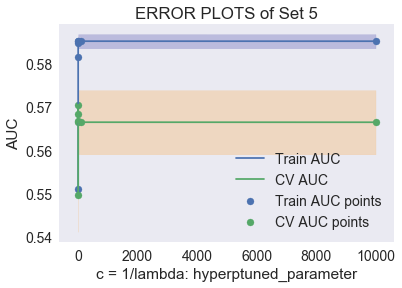

In [275]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
tuned_parameters = {'C': [10**-4, 10**-2, 10**-1,10**0,10**1, 10**2, 10**4]}

clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid=tuned_parameters, cv=5, scoring='roc_auc')
clf.fit(set5_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("c = 1/lambda: hyperptuned_parameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of Set 5")
plt.grid()
plt.show()

In [276]:
tuned_parameters = [{'C': [10**-3, 10**-2,10**-1 ,10**0,10**1 ,10**-4]}]


model = GridSearchCV(LogisticRegression(penalty='l1'),tuned_parameters , scoring = 'f1', cv=5)
model.fit(set5_tr, y_train)

print(model.best_estimator_)
print(model.score(set5_cr, y_cv))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9181018072693884


In [270]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred


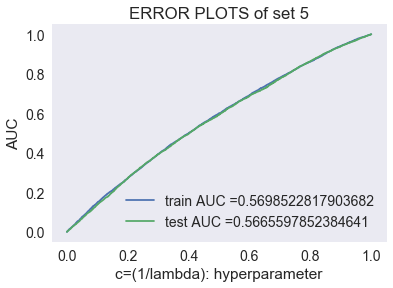

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc

best_lambda=0.001
clf = LogisticRegression(C=best_lambda, penalty='l2')
clf.fit(set5_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, set5_tr)    
y_test_pred = batch_predict(clf, set5_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("c=(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set 5")
plt.grid()
plt.show()

In [277]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
Train_confusion_matrix=(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
Test_confusion_matrix=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))

the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.842
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.842


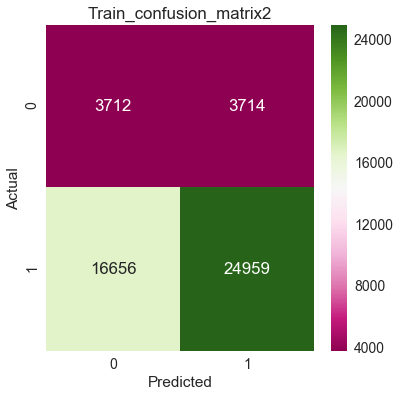

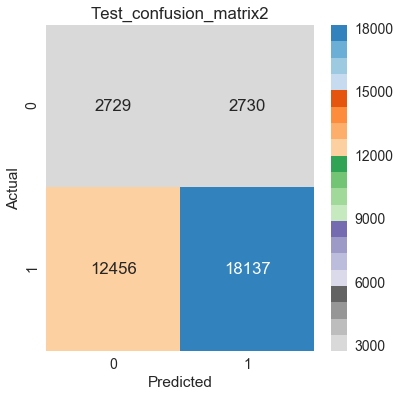

In [279]:
#https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_cm = pd.DataFrame(Train_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Train_confusion_matrix2")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="PiYG", annot=True,fmt="d")# font size

#Test_confusion_matrix
df_cm = pd.DataFrame(Test_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Test_confusion_matrix2")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="tab20c_r",annot=True,fmt="d")# font si

<h1>3. Conclusion</h1>

In [281]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["vectoriser", "model", "Hyper parameter=lambda", "AUC of test"]
x.add_row(["BOW", 'Brute', 10000, 55])
x.add_row(["TFIDF", 'Brute', 1000, 54])
x.add_row(["avgWord2vec", 'Brute', 10, 69])
x.add_row(["tfidfWord2vec", 'Brute', 1000, 56])
x.add_row(["SET-5", 'Brute', 1000, 57])
print(x)

+---------------+-------+------------------------+-------------+
|   vectoriser  | model | Hyper parameter=lambda | AUC of test |
+---------------+-------+------------------------+-------------+
|      BOW      | Brute |         10000          |      55     |
|     TFIDF     | Brute |          1000          |      54     |
|  avgWord2vec  | Brute |           10           |      69     |
| tfidfWord2vec | Brute |          1000          |      56     |
|     SET-5     | Brute |          1000          |      57     |
+---------------+-------+------------------------+-------------+


## from above all models except avgword2vec all have the lambda very large which leads to underfit of the model. avgword2vec model is considerablly better than all above models.